<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></span></li><li><span><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li><li><span><a href="#Reminders" data-toc-modified-id="Reminders-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reminders</a></span></li><li><span><a href="#Gephi" data-toc-modified-id="Gephi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gephi</a></span></li><li><span><a href="#Stability" data-toc-modified-id="Stability-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stability</a></span><ul class="toc-item"><li><span><a href="#Main-graph" data-toc-modified-id="Main-graph-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Main graph</a></span></li><li><span><a href="#Log-transform" data-toc-modified-id="Log-transform-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Log transform</a></span></li><li><span><a href="#Mode" data-toc-modified-id="Mode-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Mode</a></span></li></ul></li><li><span><a href="#Colors" data-toc-modified-id="Colors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Colors</a></span></li><li><span><a href="#groups" data-toc-modified-id="groups-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>groups</a></span><ul class="toc-item"><li><span><a href="#treeview" data-toc-modified-id="treeview-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>treeview</a></span></li></ul></li><li><span><a href="#Leiden" data-toc-modified-id="Leiden-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Leiden</a></span><ul class="toc-item"><li><span><a href="#NMI" data-toc-modified-id="NMI-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>NMI</a></span></li><li><span><a href="#plain" data-toc-modified-id="plain-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>plain</a></span></li><li><span><a href="#log-repeat" data-toc-modified-id="log-repeat-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>log repeat</a></span></li></ul></li></ul></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Tue Dec 04 2018 

CPython 3.6.6
IPython 7.2.0

numpy 1.15.3
scipy 1.1.0
pandas 0.23.4
sklearn 0.20.0
matplotlib 3.0.1
seaborn 0.9.0
networkx 2.2
notebook 5.7.2
jupyter_contrib_nbextensions 0.5.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-39-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

import igraph
import sklearn
import itertools

from scipy.stats import describe
from scipy.stats import ttest_ind

from collections import defaultdict

### Autoimport my code

In [3]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [4]:
cd ..

/home/jessime/Code/kmers3


In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

### Plotting

In [7]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Reminders

* All images should be saved as pdfs. They can be converted from pdf to png as necessary, but you can’t convert a png to pdf.
* When finished with a notebook, archive it with `jupyter nbconvert --to pdf nb.ipynb`

# Gephi

In November, I setup all the edgelists and calculated champ values for regular and log-normalized communities for human and mouse. Following the protocol at the end of the March 2018 notebook, I'm going to get these into gephi next.

To do that, I need to make gml files though. And to do that, I want labels.

In [29]:
extend_headers = """>||||SAMMSON-001||2027|
>||||XACT-001||321919|
>||||RSX-001||24118|
>||||NESPAS-001||1156|
>||||NESPAS-US-001||31986|
>||||UBE3A-ATS-001||615410|
>||||MORRBID-001||1522|
>||||AIRN-US-001||4374|
>||||TSIX-US-001||37027|
"""
extend_headers = [x.split('|')[4] for x in extend_headers.splitlines()]
headers = '/home/jessime/Research/mrna_lncrna/v26_combo_names.pkl'
headers = pickle.load(open(headers, 'rb'))
extend_headers = headers + extend_headers
outfile = '/home/jessime/Research/mrna_lncrna/v26_extend_names.pkl'
pickle.dump(extend_headers, open(outfile, 'wb'))
extend_headers[:2] + extend_headers[-2:]

['MIR1302-2HG-UN', 'FAM138A-UN', 'AIRN-US-001', 'TSIX-US-001']

In [30]:
extend_headers = """>||||Ube3a_long-201||911470|
>||||Ube3a_short-201||113545|
>Tsix-201|Tsix-201|Tsix-201|Tsix-201|Tsix-201|Tsix-201|53442|
>||||Rsx-001||24118|
>||||Airn88-201||88813|
>ENST00000597346.1|ENSG00000269821.1|OTTHUMG00000171022.2|OTTHUMT00000411275.2|KCNQ1OT1-001|KCNQ1OT1|91667|
>ENST00000429829.4|ENSG00000229807.8|OTTHUMG00000021839.4|OTTHUMT00000057239.1|XIST-001|XIST|19275|
>||||Bvht-001||601|
>||||Nespas_genomic-001||14200|
>||||Morrbid-001||2797|
>||||Anril-001||2069|
>||||Haunt-001||3400|
>||||XistAR-201||2789|
>ENSMUST00000186386.6||||Upperhand-201|AV026068|803|
"""
extend_headers = [x.split('|')[4] for x in extend_headers.splitlines()]
headers = '/home/jessime/Research/mrna_lncrna/M14_combo_names.pkl'
headers = pickle.load(open(headers, 'rb'))
extend_headers = headers + extend_headers
outfile = '/home/jessime/Research/mrna_lncrna/M14_extend_names.pkl'
pickle.dump(extend_headers, open(outfile, 'wb'))
extend_headers[:2] + extend_headers[-2:]

['4933401J01Rik-UN', 'Gm37180-UN', 'XistAR-201', 'Upperhand-201']

In [10]:
%aimport network

In [36]:
el_path = '/home/jessime/Research/mrna_lncrna/v26_extend_el.tab.gz'
df_path = '/home/jessime/Research/mrna_lncrna/v26_extend_champ100.csv'
champ100 = pd.read_csv(df_path, index_col=0)
gm = network.GraphMaker2(el_path=el_path)
graph = gm.edgelist2igraph()

Just based on looking at the ratios.csv file I made, I'm going to choose two gamma values to check in gephi.

In [37]:
names = '/home/jessime/Research/mrna_lncrna/v26_extend_names.pkl'
names = pickle.load(open(names, 'rb'))

graph.vs['name'] = names
graph.vs['1.476'] = champ100['1.476'].values
graph.vs['2.379'] = champ100['2.379'].values

outfile = '/home/jessime/Research/mrna_lncrna/v26_extend.gml'
graph.write_gml(outfile)

In [38]:
el_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_el.tab.gz'
df_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_champ100.csv'
champ100_log = pd.read_csv(df_path, index_col=0)
gm_log = network.GraphMaker2(el_path=el_path)
graph_log = gm_log.edgelist2igraph()

graph_log.vs['name'] = names
graph_log.vs['1.554'] = champ100_log['1.554'].values


outfile = '/home/jessime/Research/mrna_lncrna/v26_extend_log.gml'
graph_log.write_gml(outfile)

This is a bit of an aside, but since I'm looking at how similar regular vs log are, let's do a crosstab for these two:

In [42]:
pd.crosstab(champ100['2.379'].clip_upper(12).values, 
            champ100_log['1.554'].clip_upper(12).values)

col_0    0     1     2     3     4     5     6     7     8     9    10   11  \
row_0                                                                         
0      8133    62   108    27    24    19     1     3     4     2    0    2   
1       551  6848   111    14    91     3     9    10     0   223   11    0   
2       190    19  6503   551    16     2   114    10    79    18    7    3   
3      3088  3588     3     1    88     0     0     1     0     0    0    0   
4        21     4   129  5470     2    28    36     2    20     4    3    2   
5        27     2   376   989     1   136  3844     3    16     9    6    3   
6       114   164    29     3  4665     0     2   223     3    29    2    0   
7        28     5    55   705     1  4004   133     2    10    34   16    2   
8       165   129   411    29    32   132   432    71    19  2745  321    7   
9        75    11    43     4   722     0     1  3377   279    18    0    1   
10       15     2    16    10     6   317    12    44  3055     8    1    0   
11       20    13    51    12     2     4    15     7     7     5    1  382   
12      183   105    32     4    11    20    44     7     3    20  166    0   

col_0  12  
row_0      
0       5  
1       4  
2       7  
3       1  
4       1  
5       6  
6       2  
7       4  
8      45  
9       2  
10      0  
11      2  
12     86

# Stability

In [44]:
%aimport network

In [50]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend.gml'
stability = network.Stability(gml_path=gml_path, gamma=2.379)
stability.run_louvain()

/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)


Run 0 at gamma = 2.379.  Return time: 10767.5736
Run 10 at gamma = 2.379.  Return time: 192.5399
Run 20 at gamma = 2.379.  Return time: 241.2749
Run 50 at gamma = 2.379.  Return time: 216.9359
Run 30 at gamma = 2.379.  Return time: 167.3050
Run 40 at gamma = 2.379.  Return time: 222.5418
Run 70 at gamma = 2.379.  Return time: 253.5890
Run 80 at gamma = 2.379.  Return time: 157.3394
Run 60 at gamma = 2.379.  Return time: 206.1897
Run 90 at gamma = 2.379.  Return time: 87.6801


/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [58]:
stability_df = pd.DataFrame(np.array(stability.partitions.partitions).T,
    columns=stability.partitions.resolutions)
stability_df.head()

2.378900  2.378902  2.378904  2.378906  2.378908  2.378910  2.378912  \
0         3         4         8         1        19         6         4   
1         0         1         0         1         0         0         0   
2        13        12        14         7        12        13        13   
3        14        13        12        10        13        11        10   
4         0         1         0         1         0         0         0   

   2.378914  2.378916  2.378918    ...     2.379080  2.379082  2.379084  \
0         5         6         7    ...            5         6         1   
1         1         0         0    ...            0         0         1   
2         4         2        14    ...           13         8         8   
3        12        11        11    ...           12        10        12   
4         1         0         0    ...            0         0         1   

   2.379086  2.379088  2.379090  2.379092  2.379094  2.379096  2.379098  
0         1         6         6         0         5         5         0  
1         1         0         0         0         0         0         0  
2        14         8        13         8        13        13        14  
3        13        12        11        12        12        12        13  
4         1         0         0         0         0         0         0  

[5 rows x 100 columns]

In [122]:
class Stability:
    """Find nodes that are consistantly in the top communities

    Parameters
    ----------
    gml_path: str
        Path to igraph formatted gml file
    gamma: float
        Gamma chosen by CHAMP to use for network
    n_groups: int
        Number of non-null groups expected in graph
    """
    def __init__(self, gml_path=None, outfile=None, gamma=1., n_groups=10):
        self.gml_path = gml_path
        self.outfile = outfile
        self.gamma = gamma
        self.n_groups = n_groups
        
        if self.gml_path is not None:
            self.graph = ig.Graph.Read_GML(self.gml_path)
        self.louvain = None
        self.group_df = None
        
    def run_louvain(self):
        start = self.gamma - .0001
        end = self.gamma + .0001
        self.louvain = champ.parallel_louvain(self.graph,
            start=start, fin=end, numruns=100, weight='weight', progress=10)
        
    def make_group_df(self):
        data = np.array(self.louvain.partitions).T
        columns = self.louvain.resolutions
        self.group_df = pd.DataFrame(data, columns= columns)

    def calc_stability(self):
        def percentage(row, n):
            #Use `<` here instead of `<=`, since groups are 0 based
            return sum(row < n) / len(row)
        self.group_df['stability'] = self.group_df.apply(percentage, 
                                                         axis=1, 
                                                         args=(self.n_groups,))
        self.group_df['stable'] = self.group_df['stability'] >= .9
        return self.group_df['stable'].value_counts()
        
    def add_to_graph(self):
        self.graph.vs['stable'] = self.group_df['stable']
        if self.outfile is not None:
            self.graph.write_gml(outfile)
            
    def run(self):
        self.run_louvain()
        self.make_group_df()
        self.calc_stability()
        self.add_to_graph()

In [87]:
stability_test = Stability(outfile='/home/jessime/Research/mrna_lncrna/v26_extend_stable.gml', n_groups=14)
stability_test.group_df = stability_df

In [88]:
stability_test.calc_stability()

True     54793
False    10895
Name: stable, dtype: int64

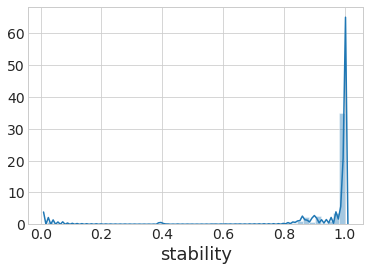

In [93]:
sns.distplot(stability_df['stability'])
plt.show()

In [102]:
champ_runner = network.ChampRunner()
champ_runner.df = stability_df[stability_df.columns[:-2]]
champ_runner.find_top_communities()
champ_runner.calc_ratios()

In [104]:
champ_runner.top_communities.mean(axis=1)

0     7356.12
1     6439.53
2     5432.39
3     4985.82
4     4710.25
5     4489.69
6     4344.51
7     4157.32
8     3945.80
9     3706.07
10    3416.13
11    3185.90
12    2841.92
13    2175.98
14    1594.96
15     970.11
16     614.43
17     440.22
18     291.47
19     164.80
dtype: float64

In [105]:
champ_runner.ratios.mean(axis=1)

0-1      1.00
1-2      1.00
2-3      1.00
3-4      1.00
4-5      1.00
5-6      1.00
6-7      1.00
7-8      1.00
8-9      1.00
9-10     1.00
10-11    1.00
11-12    1.00
12-13    1.16
13-14    1.24
14-15    1.39
15-16    1.22
16-17    1.14
17-18    1.31
18-19    1.46
dtype: float64

In [135]:
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_stable.gml'
stability_test = network.Stability(out_path=out_path, n_groups=15)
stability_test.group_df = stability_df
stability_test.calc_stability()
stability_test.graph = stability.graph
stability_test.add_to_graph()

So... I was thrown for a bit of a loop. Basically, the 12 groups at `g ~= 2.3` was an outlier. In general, n_groups should be more around 15 (as shown above). I'm going to go with that. Which means we have 16 groups total.

I also need to label nodes that are in the main community, which I haven't done yet. And, really I should just go ahead and drop them and make the `main_sub`. I don't need to carry around either the nodes or their edges in Gephi, etc.

Let's do that and then redo this, just to compare. Interestingly, my instructions from March don't mention finding the main...

## Main graph

In [110]:
gm1 = network.GraphMaker()
gm1.graph = nx.Graph(stability.graph.get_edgelist())
gm1.find_main_sub()

In [118]:
diff = set(gm1.graph.nodes) - set(gm1.main_sub.nodes)
diff

{1366, 4311, 5019, 8623, 12446, 16724, 19015, 19528, 22123, 25099}

In [119]:
for node in diff:
    print(stability.graph.vs[node]['name'])

RP11-497E19.2-SP
RP11-182L7.1-SP
BOLA3-AS1-SP
RP11-325L7.1-SP
BOLA3-AS1-UN
RP11-253D19.1-SP
RP11-253D19.1-UN
RP11-497E19.2-UN
RP11-182L7.1-UN
RP11-325L7.1-UN


Well that explains why it isn't mentioned. There are only 10 nodes that fall out. I'm going to leave them.

## Log transform

Now I get to try it a second time with the log transform. This will have less code here.

In [7]:
%aimport network

In [8]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend.gml'
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_stable.gml'
stability = network.Stability(gml_path=gml_path, 
                              out_path=out_path,
                              gamma=2.379,
                              n_groups=15)
stability.run()

/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)


Run 0 at gamma = 2.379.  Return time: 113.5062


/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**WARNING:** Note that I didn't use the log normalized input here. I'm going to move this `out_path` to the correct location, and run the *actual* log normalized output lower down.

In [10]:
stability.group_df.head()

2.3789  2.3789019999999996  2.378904  2.3789059999999997  2.378908  \
0       1                  13         1                   5         1   
1       1                   0         1                   1         1   
2       2                   6         2                   6         5   
3       1                   0         1                   1         1   
4       1                   0         1                   1         1   

   2.37891  2.3789119999999997  2.378914  2.378916  2.3789179999999996  \
0       13                  16        18         1                   1   
1        0                   0         0         1                   1   
2       14                   7         8        11                   2   
3        0                   0         0         1                   1   
4        0                   0         0         1                   1   

    ...    2.379084  2.379086  2.3790880000000003  2.37909  2.379092  \
0   ...           0         0                   0        0         1   
1   ...           0         0                   0        0         1   
2   ...           4         7                   9        3         8   
3   ...           0         0                   0        0         1   
4   ...           0         0                   0        0         1   

   2.3790940000000003  2.379096  2.3790980000000004  stability  stable  
0                   1         1                   0       0.76   False  
1                   1         1                   0       1.00    True  
2                   4         3                   1       1.00    True  
3                   1         1                   0       1.00    True  
4                   1         1                   0       1.00    True  

[5 rows x 102 columns]

**Note:** I'm grouping this log transform run here, but it includes the `mode` code developped below.

In [80]:
%aimport network

In [81]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log.gml'
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_stable.gml'
stability_log = network.Stability(gml_path=gml_path, 
                              out_path=out_path,
                              gamma=2.379,
                              n_groups=15)
stability_log.run()

/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)


Run 0 at gamma = 2.379.  Return time: 90.8241


/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Ugh, forgot to delete old groups.

In [82]:
del stability_log.graph.vs['igraph1476']
del stability_log.graph.vs['igraph2379']

In [83]:
stability_log.graph.write_gml(stability_log.out_path)

That doesn't really matter for the size of the file :( it's all the stupid edges.

## Mode

In [58]:
mode = stability.group_df.mode(axis=1)[[0]]
mode_vc = mode[0].value_counts()
mode_vc.head(18)

0     6909
3     6738
1     6394
2     5518
12    4975
4     4910
5     4584
8     4368
6     4328
13    4059
9     3796
10    3736
11    1558
14    1241
15    1162
16     594
18     190
17     176
Name: 0, dtype: int64

In [54]:
stable_df = stability.group_df[stability.group_df['stable']]
print(stable_df.shape)
stable_df[stable_df.columns[:-2]].mode(axis=1)[0].value_counts().head(18)

(61475, 102)


0.0     6812
3.0     6702
1.0     6226
2.0     5499
12.0    4906
4.0     4884
5.0     4537
8.0     4314
6.0     4291
13.0    3999
9.0     3726
10.0    3720
11.0    1522
14.0     285
7.0       52
Name: 0, dtype: int64

Okay, so the stable nodes don't matter. It's just that I have to relabel properly, once I've got the mode.

In [62]:
mode_vc.head(15)

0     6909
3     6738
1     6394
2     5518
12    4975
4     4910
5     4584
8     4368
6     4328
13    4059
9     3796
10    3736
11    1558
14    1241
15    1162
Name: 0, dtype: int64

In [65]:
mapping_dict = {}
for i, old_group in enumerate(mode_vc.index):
    if i < 15:
        mapping_dict[old_group] = i
    else:
        mapping_dict[old_group] = 15
        
mode['group'] = mode[0].map(mapping_dict)
mode['group'].value_counts()

0     6909
1     6738
2     6394
3     5518
4     4975
5     4910
6     4584
7     4368
8     4328
9     4059
10    3796
11    3736
12    1558
15    1412
13    1241
14    1162
Name: group, dtype: int64

Great. `mode['group']` has the communities I need, including the null, in the right order.

Let's save that graph.

In [69]:
del stability.graph.vs['igraph2379']
del stability.graph.vs['igraph1476']

In [72]:
stability.graph.vs['group'] = mode['group'].values
stability.graph.write_gml(stability.out_path)

**Warning:** (see previous warning for more context. I messed labels up. Need to move this:

In [74]:
!mv /home/jessime/Research/mrna_lncrna/v26_extend_log_stable.gml \
/home/jessime/Research/mrna_lncrna/v26_extend_stable.gml

# Colors

The node coloring problem has been fixed!!! 

It's all thanks to this plugin:

https://github.com/gephi/gephi/wiki/Scripting-Plugin

So, now all I have to do is run:

```python
import java
#color_dict = {}#get rgb color_dict in here
for i, n in enumerate(g.nodes):
    group = n.group
    if group > 14:
        group = 14
    c = color_dict[group]
    n.color = java.awt.Color(*c)
    print(i)
```

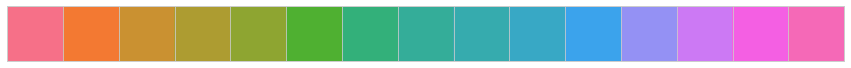

In [13]:
sns.palplot(sns.color_palette("husl", 15))

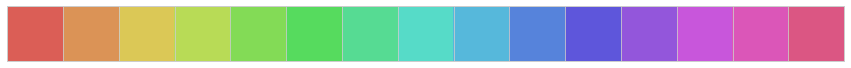

In [20]:
sns.palplot(sns.color_palette("hls", 15))

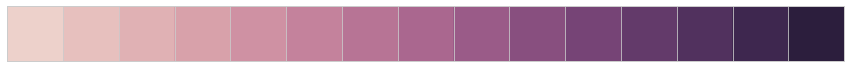

In [14]:
sns.palplot(sns.cubehelix_palette(15))

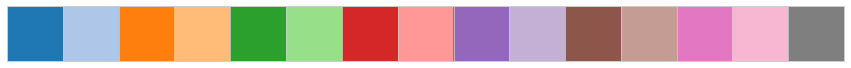

In [15]:
sns.palplot(sns.color_palette("tab20", 15))

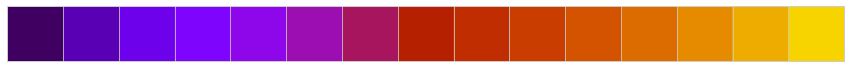

In [19]:
sns.palplot(sns.color_palette("gnuplot", 15))

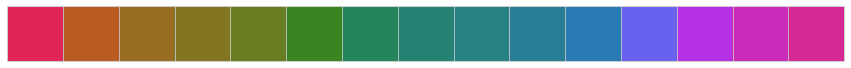

In [29]:
sns.palplot(sns.husl_palette(15, l=.5))

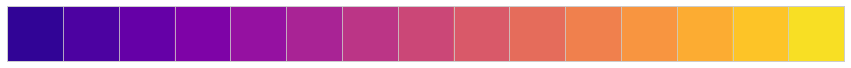

In [30]:
sns.palplot(sns.color_palette("plasma", 15))

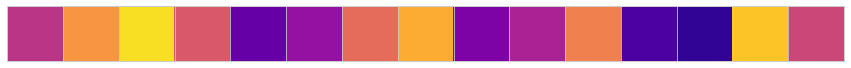

In [33]:
pal = sns.color_palette("plasma", 15)
np.random.shuffle(pal)
sns.palplot(pal)

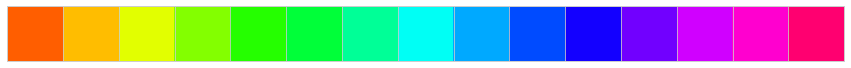

In [35]:
sns.palplot(sns.color_palette("hsv", 15))

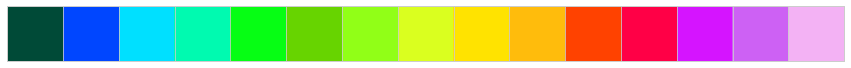

In [37]:
sns.palplot(sns.color_palette("gist_ncar", 15))

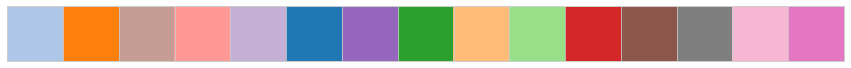

In [41]:
pal = sns.color_palette("tab20", 15)
np.random.shuffle(pal)
sns.palplot(pal)

In [42]:
pal

[(0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

In [75]:
color_dict = dict(zip(range(15), pal))
color_dict

{0: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 3: (1.0, 0.596078431372549, 0.5882352941176471),
 4: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 5: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 6: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 7: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 8: (1.0, 0.7333333333333333, 0.47058823529411764),
 9: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 10: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 11: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 12: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 13: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 14: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}

In [26]:
for color in pal:
    new = []
    for value in color:
        value *= 255
        new.append(int(value))
    print(new)

[174, 199, 232]
[255, 127, 14]
[196, 156, 148]
[255, 152, 150]
[197, 176, 213]
[31, 119, 180]
[148, 103, 189]
[44, 160, 44]
[255, 187, 120]
[152, 223, 138]
[214, 39, 40]
[140, 86, 75]
[127, 127, 127]
[247, 182, 210]
[227, 119, 194]


Yea, that's okay, but not my favorite. I'll lock down colors later. At least everything works in Gephi.

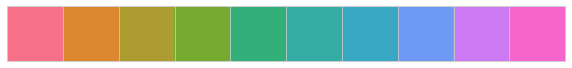

In [44]:
sns.palplot(sns.color_palette("husl", 10))

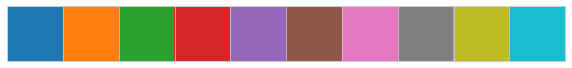

In [46]:
sns.palplot(sns.color_palette("tab20", 20)[::2])

In [77]:
pal = sns.color_palette("tab20", 20)[::2]
color_dict = dict(zip(range(10), pal))
color_dict

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 8: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 9: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)}

In [ ]:
import java
num = 10 #Number of 'real' communities
for n in g.nodes:
    group = n.group
    if group <= num - 1:
        c = color_dict[group]
        n.color = java.awt.Color(*c)

# groups

Where do XIST and other interesting lncRNAs fall in our communities?

Let's make some csv files describing the transcripts.

In [8]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend_stable.gml'
graph = igraph.Graph.Read_GML(gml_path)

In [9]:
df = pd.DataFrame(data=graph.vs['group'], index=graph.vs['name'], columns=['group'])
df['stable'] = graph.vs['stable']
df.head()

group  stable
MIR1302-2HG-UN      0.0     0.0
FAM138A-UN          0.0     1.0
RP11-34P13.7-UN     1.0     1.0
RP11-34P13.8-UN     0.0     1.0
RP11-34P13.14-UN    0.0     1.0

In [10]:
outfile = '/home/jessime/Research/mrna_lncrna/v26_extend_groups.csv'
df.to_csv(outfile)

In [22]:
interesting = ['XIST', 'MALAT1', 'AIRN', 'KCNQ1OT1', 'NEAT1']
unspliced = [x + '-UN' for x in interesting]
interesting = unspliced + [x + '-SP' for x in interesting]
interesting.append('RSX-001')

df[df.index.isin(interesting)]

group  stable
KCNQ1OT1-UN    5.0     1.0
NEAT1-UN      10.0     1.0
MALAT1-UN      7.0     1.0
AIRN-UN        6.0     1.0
XIST-UN        1.0     1.0
XIST-SP        1.0     1.0
RSX-001       15.0     0.0

In [28]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_stable.gml'
graph = igraph.Graph.Read_GML(gml_path)
df_log = pd.DataFrame(data=graph.vs['group'], index=graph.vs['name'], columns=['group'])
df_log['stable'] = graph.vs['stable']
outfile = '/home/jessime/Research/mrna_lncrna/v26_extend_log_groups.csv'
df_log.to_csv(outfile)

df_log[df_log.index.isin(interesting)]

group  stable
KCNQ1OT1-UN   11.0     1.0
NEAT1-UN       0.0     1.0
MALAT1-UN      4.0     1.0
AIRN-UN        6.0     1.0
XIST-UN        5.0     1.0
XIST-SP        5.0     1.0
RSX-001        2.0     0.0

In [36]:
len(df[(df['group'] == 14) & (df['stable']==1)])

0

Sooo... all of my last group isn't in stable. How did that happen?

In [38]:
counts = []
v26_rnas = ['/home/jessime/Research/mrna_lncrna/v26_6mers_lnc_unspliced.npy',
'/home/jessime/Research/mrna_lncrna/v26_6mers_lnc_spliced001.npy',
'/home/jessime/Research/mrna_lncrna/v26_6mers_pc_unspliced.npy',
'/home/jessime/Research/mrna_lncrna/v26_6mers_pc_spliced001.npy']

for rnas in v26_rnas:
    rnas = np.load(rnas)
    counts.append(len(rnas))

In [42]:
sum(counts) + 9

65688

Since I still have it loaded in memory, I'm going to just modify the already saved files.

In [45]:
lncrna = [True]*(counts[0] + counts[1]) + [False] * (counts[2] + counts[3]) + [True] * 9
spliced = [False]*counts[0] + [True]*counts[1] + [False]*counts[2] + [True]*counts[3]
spliced += [True, True, False, True, False, True, True, False, False]
transcript_type = ['lnc_un']*counts[0] + ['lnc_sp']*counts[1] + ['pc_un']*counts[2] + ['pc_sp']*counts[3]
transcript_type += ['lnc_sp', 'lnc_sp', 'lnc_un', 'lnc_sp', 'lnc_un', 'lnc_sp', 'lnc_sp', 'lnc_un', 'lnc_un']
print(len(lncrna))
print(len(spliced))
print(len(transcript_type))

65688
65688
65688


In [46]:
df['lncRNA'] = lncrna
df['spliced'] = spliced
df['type'] = transcript_type
outfile = '/home/jessime/Research/mrna_lncrna/v26_extend_groups.csv'
df.to_csv(outfile)

In [47]:
df_log['lncRNA'] = lncrna
df_log['spliced'] = spliced
df_log['type'] = transcript_type
outfile = '/home/jessime/Research/mrna_lncrna/v26_extend_log_groups.csv'
df_log.to_csv(outfile)

In [48]:
df.head()

group  stable  lncRNA  spliced    type
MIR1302-2HG-UN      0.0     0.0    True    False  lnc_un
FAM138A-UN          0.0     1.0    True    False  lnc_un
RP11-34P13.7-UN     1.0     1.0    True    False  lnc_un
RP11-34P13.8-UN     0.0     1.0    True    False  lnc_un
RP11-34P13.14-UN    0.0     1.0    True    False  lnc_un

In [66]:
df_grouped = df.drop('type', axis=1).groupby(by='group')
df_summed = df_grouped.sum(dtype=np.int)
df_summed['total'] = df_grouped.count()['stable']
df_summed['stable'] = df_summed['stable'].astype(np.int)
df_summed

stable  lncRNA  spliced  total
group                                
0.0      6772    3197     3147   6909
1.0      6702    3368     1613   6738
2.0      6296    2078     3738   6394
3.0      5499    2688     2312   5518
4.0      4901    1662     3466   4975
5.0      4884    3580     2689   4910
6.0      4531    1804     2807   4584
7.0      4314     797     1351   4368
8.0      4287     486     4081   4328
9.0      3985    2268     1368   4059
10.0     3726    2136     1157   3796
11.0     3719    1116      535   3736
12.0     1522     436      236   1558
13.0      285     707      323   1241
14.0        0     662      494   1162
15.0       52     688      951   1412

In [67]:
df_log_grouped = df_log.drop('type', axis=1).groupby(by='group')
df_log_summed = df_log_grouped.sum(dtype=np.int)
df_log_summed['total'] = df_log_grouped.count()['stable']
df_log_summed['stable'] = df_log_summed['stable'].astype(np.int)
df_log_summed

stable  lncRNA  spliced  total
group                                
0.0      7166    2883     1512   7247
1.0      6947    3348     3205   7112
2.0      5874    1794     3625   5974
3.0      5641    2763     2380   5658
4.0      4890    1055     1448   4910
5.0      4852    2744     1385   4896
6.0      4472    1779     2767   4527
7.0      4305     471     4084   4341
8.0      3975    1482     3291   4013
9.0      3003     889      544   3040
10.0     2910    1680      906   2980
11.0     2812    2045     1638   2829
12.0     1454    1446      830   2511
13.0     2026    1526     1083   2053
14.0        0     568      750   1094
15.0     1058    1200      820   2503

In [74]:
pd.crosstab(df[df['stable'] == True]['group'], df[df['stable'] == True]['type'])

type   lnc_sp  lnc_un  pc_sp  pc_un
group                              
0.0      1559    1539   1510   2164
1.0       814    2527    784   2577
2.0      1065     944   2615   1672
3.0       659    2013   1644   1183
4.0      1215     415   2214   1057
5.0      1813    1745    857    469
6.0       903     881   1873    874
7.0       213     562   1124   2415
8.0       415      49   3628    195
9.0       973    1241    363   1408
10.0      767    1334    345   1280
11.0      260     842    267   2350
12.0      123     295    102   1002
13.0       51     142     26     66
15.0       11      20     11     10

In [75]:
df_log_stable = df_log[df_log['stable'] == True]
pd.crosstab(df_log_stable['group'], df_log_stable['type'])

type   lnc_sp  lnc_un  pc_sp  pc_un
group                              
0.0       886    1952    575   3753
1.0      1619    1602   1492   2234
2.0       948     802   2612   1512
3.0       685    2063   1690   1203
4.0       288     756   1147   2699
5.0       683    2029    683   1457
6.0       883     876   1850    863
7.0       407      50   3645    203
8.0      1174     284   2087    430
9.0       285     584    243   1891
10.0      654     982    216   1058
11.0     1107     926    520    259
12.0      371     523    192    368
13.0      727     774    332    193
15.0      100     307     69    582

## treeview

In [8]:
%aimport label_heatmap

In [25]:
pal = [(0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

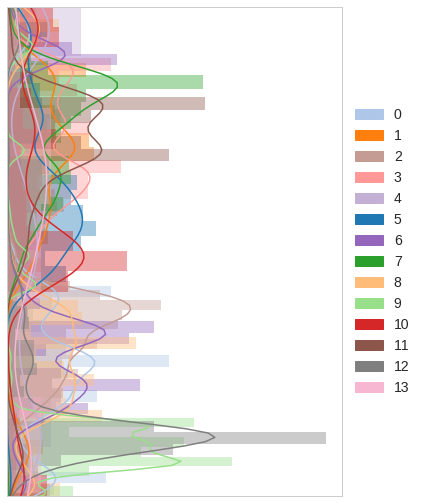

In [30]:
names = '/home/jessime/Desktop/45k_list.txt'
groups = '/home/jessime/Research/mrna_lncrna/v26_extend_groups.csv'
out_path = '/home/jessime/Desktop/45k_group_distros.pdf'
community_distros = label_heatmap.CommunityDistros(names, groups, out_path, colors=pal)
community_distros.plot()

In [31]:
47000/839

56.01907032181168

# Leiden

Okay, I think we have a couple too many communities. Also, this paper just came out:

[From Louvain to Leiden: guaranteeing well-connected communities](https://arxiv.org/abs/1810.08473)

I've done some testing, and it's pretty clearly better on v26, and faster. I'm working with Will and have already edited my version of CHAMP to use this algorithm.

Because of these things, I want to run CHAMP again.

In [40]:
%aimport network

Running leidenalg instead!
Run 0 at gamma = 0.100.  Return time: 470.6672
Run 10 at gamma = 0.600.  Return time: 324.9740
Run 20 at gamma = 1.100.  Return time: 343.9435
Run 30 at gamma = 1.600.  Return time: 310.1423
Run 50 at gamma = 2.600.  Return time: 289.8727
Run 40 at gamma = 2.100.  Return time: 276.3226
Run 70 at gamma = 3.600.  Return time: 228.6892
Run 60 at gamma = 3.100.  Return time: 287.0902
Run 80 at gamma = 4.100.  Return time: 281.9932
Run 90 at gamma = 4.600.  Return time: 167.8824


/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


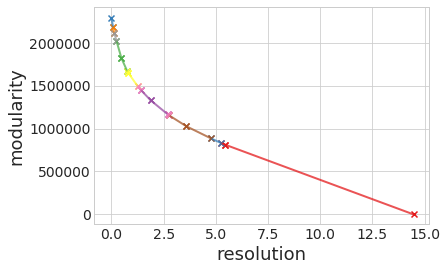

In [41]:
el_path = '/home/jessime/Research/mrna_lncrna/v26_extend_el.tab.gz'
fig_path = '/home/jessime/Research/pics/v26_extend_champ100_2.pdf'
df_path = '/home/jessime/Research/mrna_lncrna/v26_extend_champ100_2.csv'
top_path = '/home/jessime/Research/mrna_lncrna/v26_extend_champ100_top_2.csv'
ratios_path = '/home/jessime/Research/mrna_lncrna/v26_extend_champ100_ratios_2.csv'
champ_runner = network.ChampRunner(el_path, fig_path, df_path, top_path, ratios_path)
champ_runner.run()

In [42]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend.gml'
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_stable_2.gml'
stability = network.Stability(gml_path=gml_path, 
                              out_path=out_path,
                              gamma=1.881,
                              n_groups=10)
stability.run()

Running leidenalg instead!


/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)


Run 0 at gamma = 1.881.  Return time: 352.9588
Run 10 at gamma = 1.881.  Return time: 294.4116
Run 20 at gamma = 1.881.  Return time: 234.1251
Run 50 at gamma = 1.881.  Return time: 222.6890
Run 30 at gamma = 1.881.  Return time: 267.3184
Run 40 at gamma = 1.881.  Return time: 240.8540
Run 70 at gamma = 1.881.  Return time: 250.2387
Run 80 at gamma = 1.881.  Return time: 233.2226
Run 60 at gamma = 1.881.  Return time: 249.4577
Run 90 at gamma = 1.881.  Return time: 91.5667


/home/jessime/Code/CHAMP/champ/champ_functions.py:156: RuntimeWarning: Interior point calculation: scipy.optimize.linprog problem is unbounded
  RuntimeWarning)
/home/jessime/Code/CHAMP/champ/champ_functions.py:158: RuntimeWarning: Interior point calculation: falling back to 'small step' approach.
  warnings.warn("Interior point calculation: falling back to 'small step' approach.", RuntimeWarning)


In [43]:
len(set(stability.graph.vs['group']))

11

In [55]:
df = stability.group_df[['group', 'stable']]
df.index = stability.graph.vs['name']
df[df['stable'] == True]['group'].value_counts()

0     12892
2      7964
1      5877
6      4324
3      4210
7      2175
9       356
10      174
8        52
4         8
Name: group, dtype: int64

In [56]:
interesting = ['XIST', 'MALAT1', 'AIRN', 'KCNQ1OT1', 'NEAT1']
unspliced = [x + '-UN' for x in interesting]
interesting = unspliced + [x + '-SP' for x in interesting]
interesting.append('RSX-001')

df[df.index.isin(interesting)]

group  stable
KCNQ1OT1-UN      7    True
NEAT1-UN        10   False
MALAT1-UN        1    True
AIRN-UN          6    True
XIST-UN          1    True
XIST-SP          2    True
RSX-001          0    True

In [62]:
sample_df = stability.group_df[[1.880902]]
sample_df.index = stability.graph.vs['name']
sample_df[sample_df.index.isin(interesting)]

1.880902
KCNQ1OT1-UN         0
NEAT1-UN           12
MALAT1-UN          10
AIRN-UN             8
XIST-UN             4
XIST-SP             4
RSX-001             2

In [63]:
df['stable'].value_counts()

True     38032
False    27656
Name: stable, dtype: int64

So few of them are stable. Something's different about Leiden, I think.

Let's try a different tactic.

In [13]:
%aimport label_heatmap

In [14]:
label_dict = {'black': ['KCNQ1OT1-UN', 'SCAANT1-UN', 'DBET-UN', 'PCAT6-SP',
'BDNF-AS-SP', 'LINC00570-SP', 'HOTAIRM1-SP', 'HOTTIP-SP', 'PVT1-SP',
'CDKN2B-AS1-SP', 'XIST-SP', 'SAMMSON-001', 'XACT-001', 'RSX-001',
'NESPAS-001', 'NESPAS-US-001', 'UBE3A-ATS-001', 'MORRBID-001',
'AIRN-US-001', 'TSIX-US-001']}

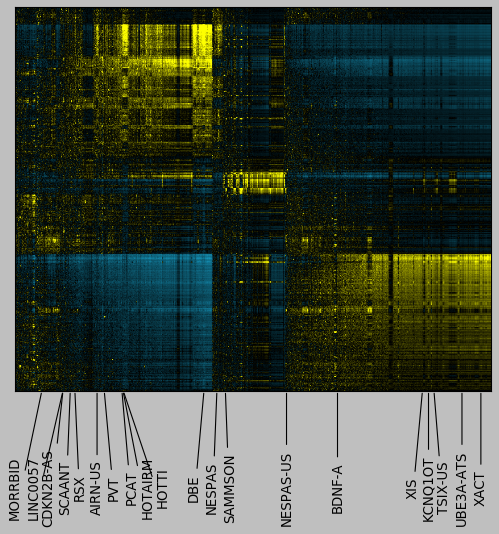

In [15]:
infile = '/home/jessime/Research/mrna_lncrna/cis_45k_list.txt'
image = '/home/jessime/Research/pics/cis_45k.png'
outfile = '/home/jessime/Research/pics/cis_45k_labeled.pdf'
label_heatmap.main(label_dict, infile, image, outfile, fontsize=12, max_iter=2000)

In [23]:
%aimport network

In [11]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend.gml'
stability = network.Stability(gml_path=gml_path)
stability.partition_ensemble = champ.parallel_louvain(
    stability.graph, start=1.880, fin=1.882, numruns=10, weight='weight')

Running leidenalg instead!


/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The be

In [30]:
stability.make_group_df()
df_leiden = stability.group_df
df_leiden.index = stability.graph.vs['name']
df_leiden.columns = df_leiden.columns.values.round(4)
df_leiden.loc[label_dict['black']]

1.8800  1.8802  1.8804  1.8806  1.8808  1.8810  1.8812  1.8814  \
KCNQ1OT1-UN         3       1       1       4       3       5       1       5   
SCAANT1-UN          8       9       0       9       9       9      13      10   
DBET-UN             7       7       0       3       5       1       8       8   
PCAT6-SP            7       7       0       3       5       1       6       0   
BDNF-AS-SP          6       2       8       1       0       3       2       2   
LINC00570-SP       12       6      12      12       1      12       9      10   
HOTAIRM1-SP         7       7       0       3       5       1       8       8   
HOTTIP-SP           7       7       0       3       5       1       8       8   
PVT1-SP             8       9       0       9       5       1       8       8   
CDKN2B-AS1-SP       3       1       8       1       0       3       1       2   
XIST-SP             5       5       7       6       6       6       4       3   
SAMMSON-001         0       4      11      13       7       4       3      12   
XACT-001            3       1       1       4       3       5       1       2   
RSX-001             2       0       3       2       4      16       6       1   
NESPAS-001          7       7       0       3       5       1       8       0   
NESPAS-US-001       1       6       2      14      11       8       0       7   
UBE3A-ATS-001       5       5       7       5       6       6       4      11   
MORRBID-001         3       1       1      11       3       5       1       5   
AIRN-US-001         7       7       0       3       5       1       8       8   
TSIX-US-001         5       5       5       4       6       6       4       3   

               1.8816  1.8818  
KCNQ1OT1-UN         6       5  
SCAANT1-UN          9       0  
DBET-UN             5       0  
PCAT6-SP            5       0  
BDNF-AS-SP          3       5  
LINC00570-SP       12      11  
HOTAIRM1-SP         5       0  
HOTTIP-SP           5       0  
PVT1-SP             5       0  
CDKN2B-AS1-SP       6       5  
XIST-SP             1       4  
SAMMSON-001         8       8  
XACT-001            6       5  
RSX-001             2       2  
NESPAS-001          5       0  
NESPAS-US-001      12       3  
UBE3A-ATS-001       1       6  
MORRBID-001        11       7  
AIRN-US-001         5       0  
TSIX-US-001         1       5

In [20]:
df_leiden.max(axis=0)

1.8800    76
1.8802    73
1.8804    77
1.8806    77
1.8808    75
1.8810    80
1.8812    75
1.8814    77
1.8816    75
1.8818    76
dtype: int64

In [24]:
gml_path = '/home/jessime/Research/mrna_lncrna/v26_extend.gml'
stab_louvain = network.Stability(gml_path=gml_path)
stab_louvain.partition_ensemble = champ.parallel_louvain(
    stab_louvain.graph, start=1.880, fin=1.882, numruns=10, weight='weight')

Running louvain.


/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/anaconda3/lib/python3.6/site-packages/igraph/__init__.py:1758: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return cls.Read_GraphML(tmpfile)
/home/jessime/Code/CHAMP/champ/champ_functions.py:156: RuntimeWarning: Interior point calculation: scipy.optimize.li

In [31]:
stab_louvain.make_group_df()
df_louvain = stab_louvain.group_df
df_louvain.index = stab_louvain.graph.vs['name']
df_louvain.columns = df_louvain.columns.values.round(4)
df_louvain.loc[label_dict['black']]

1.8800  1.8802  1.8804  1.8806  1.8808  1.8810  1.8812  1.8814  \
KCNQ1OT1-UN         0       7       6       6       7       4       8       8   
SCAANT1-UN         10       8       9       9       8       6      10       7   
DBET-UN             9       6       7       7       6       5       9       6   
PCAT6-SP            9       1       7       7       1       5       0       0   
BDNF-AS-SP          0       2       6       1       7       4       8       3   
LINC00570-SP       11      13      13      11       9       0      13      13   
HOTAIRM1-SP         9       6       7       7       6       5       9       6   
HOTTIP-SP           9       6       7       7       6       5       9       6   
PVT1-SP            10       8       7       7       8       6      10       7   
CDKN2B-AS1-SP       0       7       6       1       7       4       8       8   
XIST-SP             3       4       4       0       4       3       7       5   
SAMMSON-001         8      10       5      10       3      14       2      12   
XACT-001            0       7       6       1       7       4       8       8   
RSX-001             2       1       1       3       1       1       0       0   
NESPAS-001          2       1       1       3       1       1       0       0   
NESPAS-US-001      11       0      10      11       9      15       1       1   
UBE3A-ATS-001       3       4       4       0       4       3       7       5   
MORRBID-001         0      12      12       6      12      12      11      11   
AIRN-US-001         9       6       7       7       6       5       9       6   
TSIX-US-001         3       4       4       0       4       3       7       5   

               1.8816  1.8818  
KCNQ1OT1-UN         5       5  
SCAANT1-UN          6       9  
DBET-UN             7       6  
PCAT6-SP            7       1  
BDNF-AS-SP          3       2  
LINC00570-SP       14       8  
HOTAIRM1-SP         7       6  
HOTTIP-SP           7       6  
PVT1-SP             6       9  
CDKN2B-AS1-SP       5       5  
XIST-SP             4       4  
SAMMSON-001        13      13  
XACT-001            5       5  
RSX-001             2      10  
NESPAS-001          2       1  
NESPAS-US-001       0       0  
UBE3A-ATS-001       4       4  
MORRBID-001        11      10  
AIRN-US-001         7       6  
TSIX-US-001         4       4

It seems like leiden is behaving differently, and is less stable across runs. I want to see if that's true. I think I can measure it with `normalized_mutual_info_score`.

## NMI

In [40]:
sklearn.metrics.normalized_mutual_info_score(df_louvain.iloc[:, 0], df_louvain.iloc[:, 1])

/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7844989900188324

In [41]:
sklearn.metrics.normalized_mutual_info_score(df_leiden.iloc[:, 0], df_leiden.iloc[:, 1])

0.7537624734248194

In [42]:
louvain_NMI = []
for i, j in itertools.combinations(range(10), 2):
    nmi = sklearn.metrics.normalized_mutual_info_score(df_louvain.iloc[:, i], df_louvain.iloc[:, j])
    louvain_NMI.append(nmi)
describe(louvain_NMI)

DescribeResult(nobs=45, minmax=(0.7399985743827217, 0.9022091439652866), mean=0.8216366027971701, variance=0.0011837751896094306, skewness=-0.18507016996041384, kurtosis=0.03984782011747301)

In [43]:
leiden_NMI = []
for i, j in itertools.combinations(range(10), 2):
    nmi = sklearn.metrics.normalized_mutual_info_score(df_leiden.iloc[:, i], df_leiden.iloc[:, j])
    leiden_NMI.append(nmi)
describe(leiden_NMI)

DescribeResult(nobs=45, minmax=(0.6362251532309667, 0.7629877178161425), mean=0.7104968142983766, variance=0.0006609224984556547, skewness=-0.2846449037571336, kurtosis=0.23199486742740794)

In [45]:
ttest_ind(louvain_NMI, leiden_NMI)

Ttest_indResult(statistic=17.358541062953698, pvalue=3.685530139198498e-30)

## plain

I'm going to skip doing things like "mode" and "stability" and just use the community definition provided by champ.

In [13]:
df = '/home/jessime/Research/mrna_lncrna/v26_extend_champ100_2.csv'
df = pd.read_csv(df, index_col=0)
df.head()

0.079  0.131  0.239  0.478  0.756  0.799  1.252  1.401  1.881  2.693  \
0      1      0      1      1      0      1      0      0      5      0   
1      1      0      1      1      0      1      0      0      5      0   
2      0      1      0      0      1      0      5      5      7      2   
3      1      0      1      1      0      1      0      0      5      0   
4      1      0      1      1      0      1      0      0      5      0   

   2.758  3.592  4.773  5.244  5.449  14.473  
0      0     21     23     25     28      37  
1      0      1      3     10      2       4  
2      8     14     10     11     27      23  
3      0      1     11     30     21      31  
4      0      1     19      6     23      16

In [14]:
groups = '/home/jessime/Research/mrna_lncrna/v26_extend_groups.csv'
groups = pd.read_csv(groups, index_col=0)
groups.head()

group  stable  lncRNA  spliced    type
MIR1302-2HG-UN      0.0     0.0    True    False  lnc_un
FAM138A-UN          0.0     1.0    True    False  lnc_un
RP11-34P13.7-UN     1.0     1.0    True    False  lnc_un
RP11-34P13.8-UN     0.0     1.0    True    False  lnc_un
RP11-34P13.14-UN    0.0     1.0    True    False  lnc_un

In [15]:
groups['group'] = df['1.881'].values
groups['group'] = groups['group'].clip_upper(10)
groups.drop('stable', axis=1, inplace=True)
groups.head()

group  lncRNA  spliced    type
MIR1302-2HG-UN        5    True    False  lnc_un
FAM138A-UN            5    True    False  lnc_un
RP11-34P13.7-UN       7    True    False  lnc_un
RP11-34P13.8-UN       5    True    False  lnc_un
RP11-34P13.14-UN      5    True    False  lnc_un

In [17]:
label_dict = {'black': ['KCNQ1OT1-UN', 'SCAANT1-UN', 'DBET-UN', 'PCAT6-SP',
'BDNF-AS-SP', 'LINC00570-SP', 'HOTAIRM1-SP', 'HOTTIP-SP', 'PVT1-SP',
'CDKN2B-AS1-SP', 'XIST-SP', 'SAMMSON-001', 'XACT-001', 'RSX-001',
'NESPAS-001', 'NESPAS-US-001', 'UBE3A-ATS-001', 'MORRBID-001',
'AIRN-US-001', 'TSIX-US-001']}
groups.loc[label_dict['black']]

group  lncRNA  spliced    type
KCNQ1OT1-UN        2    True    False  lnc_un
SCAANT1-UN         0    True    False  lnc_un
DBET-UN            0    True    False  lnc_un
PCAT6-SP           0    True     True  lnc_sp
BDNF-AS-SP         2    True     True  lnc_sp
LINC00570-SP       5    True     True  lnc_sp
HOTAIRM1-SP        0    True     True  lnc_sp
HOTTIP-SP          0    True     True  lnc_sp
PVT1-SP            0    True     True  lnc_sp
CDKN2B-AS1-SP      2    True     True  lnc_sp
XIST-SP            7    True     True  lnc_sp
SAMMSON-001        3    True     True  lnc_sp
XACT-001           2    True     True  lnc_sp
RSX-001            1    True    False  lnc_un
NESPAS-001         0    True     True  lnc_sp
NESPAS-US-001      5    True    False  lnc_un
UBE3A-ATS-001      7    True     True  lnc_sp
MORRBID-001        2    True     True  lnc_sp
AIRN-US-001        0    True    False  lnc_un
TSIX-US-001        7    True    False  lnc_un

In [70]:
groups['group'].value_counts()

0     8952
1     8076
2     7283
3     6787
4     6375
5     6167
6     6152
7     5873
8     5113
9     4164
10     746
Name: group, dtype: int64

In [71]:
groups['group'].value_counts().sum()

65688

That's fine. Just trying to clear space.

In [73]:
leiden_graph.vs['group'] = groups['group'].values

In [74]:
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_leiden.gml'
leiden_graph.write_gml(out_path)

In [75]:
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
groups.to_csv(out_path)

In [7]:
%aimport label_heatmap

/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


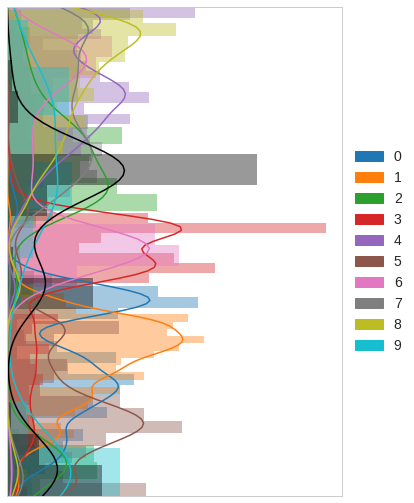

In [10]:
pal = sns.color_palette("tab20", 20)[::2]
pal.append((0, 0, 0))
names = '/home/jessime/Research/mrna_lncrna/cis_45k_list.txt'
group_path = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
out_path = '/home/jessime/Research/pics/cis_45k_group_distros.pdf'
community_distros = label_heatmap.CommunityDistros(names, group_path, out_path, colors=pal, stable_only=False)
community_distros.plot()

/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


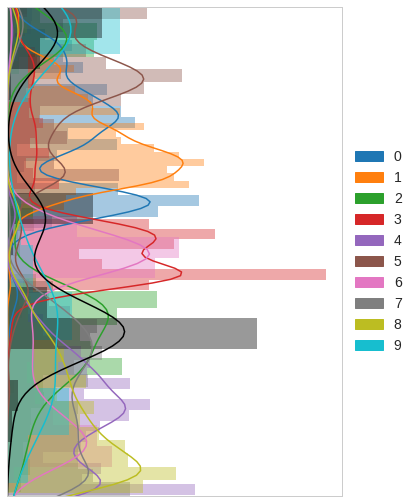

In [8]:
pal = sns.color_palette("tab20", 20)[::2]
pal.append((0, 0, 0))
names = '/home/jessime/Research/mrna_lncrna/cis_45k_list.txt'
group_path = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
out_path = '/home/jessime/Research/pics/cis_45k_group_distros_flip.pdf'
community_distros = label_heatmap.CommunityDistros(names, group_path, out_path, colors=pal, 
                                                   stable_only=False, flip=True)
community_distros.plot()

Let's make a labeled heatmap to match.

In [20]:
label_dict2 = defaultdict(list)
for name, community in groups.loc[label_dict['black']]['group'].iteritems():
    label_dict2[pal[community]].append(name)
label_dict2

defaultdict(list,
            {(0.17254901960784313,
              0.6274509803921569,
              0.17254901960784313): ['KCNQ1OT1-UN', 'BDNF-AS-SP', 'CDKN2B-AS1-SP', 'XACT-001', 'MORRBID-001'],
             (0.12156862745098039,
              0.4666666666666667,
              0.7058823529411765): ['SCAANT1-UN', 'DBET-UN', 'PCAT6-SP', 'HOTAIRM1-SP', 'HOTTIP-SP', 'PVT1-SP', 'NESPAS-001', 'AIRN-US-001'],
             (0.5490196078431373,
              0.33725490196078434,
              0.29411764705882354): ['LINC00570-SP', 'NESPAS-US-001'],
             (0.4980392156862745,
              0.4980392156862745,
              0.4980392156862745): ['XIST-SP', 'UBE3A-ATS-001', 'TSIX-US-001'],
             (0.8392156862745098,
              0.15294117647058825,
              0.1568627450980392): ['SAMMSON-001'],
             (1.0, 0.4980392156862745, 0.054901960784313725): ['RSX-001']})

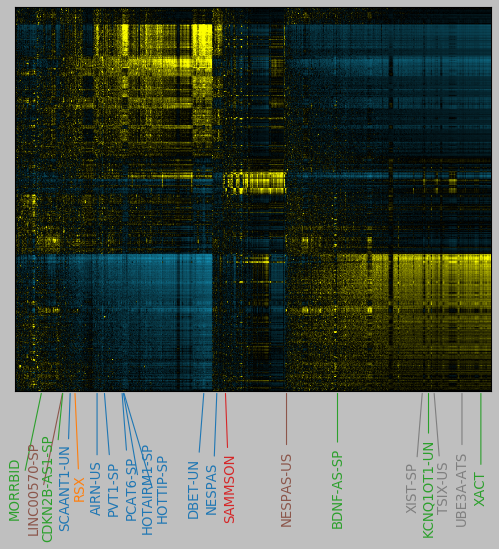

In [29]:
infile = '/home/jessime/Research/mrna_lncrna/cis_45k_list.txt'
image = '/home/jessime/Research/pics/cis_45k.png'
outfile = '/home/jessime/Research/pics/cis_45k_labeled2.pdf'
label_heatmap.main(label_dict2, infile, image, outfile, fontsize=12, max_iter=2000)

Let's also do this for log and put everything together in a illustrator file.

## log repeat

In [33]:
%aimport network

Running leidenalg instead!
Run 0 at gamma = 0.100.  Return time: 358.4649
Run 10 at gamma = 0.600.  Return time: 9594.2601
Run 20 at gamma = 1.100.  Return time: 291.9997
Run 30 at gamma = 1.600.  Return time: 207.3488
Run 50 at gamma = 2.600.  Return time: 275.1425
Run 40 at gamma = 2.100.  Return time: 164.4767
Run 70 at gamma = 3.600.  Return time: 242.3087
Run 60 at gamma = 3.100.  Return time: 249.5798
Run 80 at gamma = 4.100.  Return time: 242.0407
Run 90 at gamma = 4.600.  Return time: 108.1784


/home/jessime/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


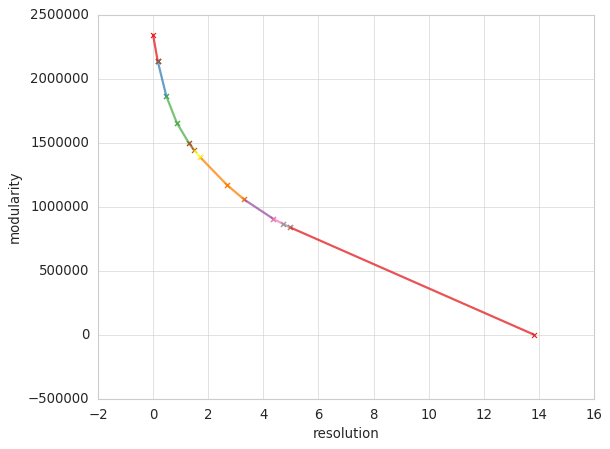

In [34]:
el_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_el.tab.gz'
fig_path = '/home/jessime/Research/pics/v26_extend_log_champ100_2.pdf'
df_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_champ100_2.csv'
top_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_champ100_top_2.csv'
ratios_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_champ100_ratios_2.csv'
champ_runner = network.ChampRunner(el_path, fig_path, df_path, top_path, ratios_path, leiden=True)
champ_runner.run()

Let's extract just the "groups" we want.

In [9]:
groups2 = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
groups2 = pd.read_csv(groups2, index_col=0)
groups2.head()

group  lncRNA  spliced    type
MIR1302-2HG-UN        5    True    False  lnc_un
FAM138A-UN            5    True    False  lnc_un
RP11-34P13.7-UN       7    True    False  lnc_un
RP11-34P13.8-UN       5    True    False  lnc_un
RP11-34P13.14-UN      5    True    False  lnc_un

In [17]:
gamma = '1.716'

df_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_champ100_2.csv'
champ_log = pd.read_csv(df_path, index_col=0)

groups2_log = groups2.copy()
groups2_log['group'] = champ_log[gamma].values
groups2_log['group'] = groups2_log['group'].clip_upper(10)
groups2_log_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_groups2.csv'
groups2_log.to_csv(groups2_log_path)
groups2_log.head()

group  lncRNA  spliced    type
MIR1302-2HG-UN        0    True    False  lnc_un
FAM138A-UN            5    True    False  lnc_un
RP11-34P13.7-UN       8    True    False  lnc_un
RP11-34P13.8-UN       6    True    False  lnc_un
RP11-34P13.14-UN      5    True    False  lnc_un

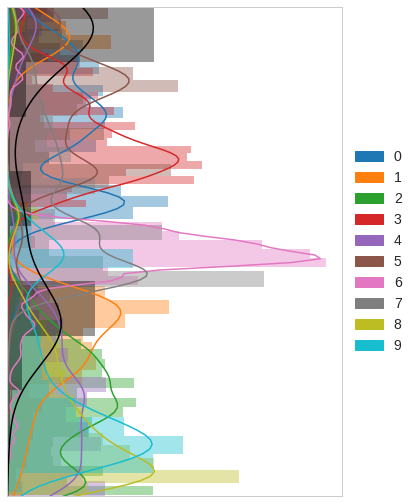

In [18]:
pal = sns.color_palette("tab20", 20)[::2]
pal.append((0, 0, 0))
names = '/home/jessime/Research/mrna_lncrna/cis_45k_list.txt'
groups2_log_path = '/home/jessime/Research/mrna_lncrna/v26_extend_log_groups2.csv'
out_log_path = '/home/jessime/Research/pics/cis_45k_group_distros_log.pdf'
community_distros = label_heatmap.CommunityDistros(names, groups2_log_path, out_log_path, colors=pal, 
                                                   stable_only=False, flip=True)
community_distros.plot()

In [19]:
label_dict = {'black': ['KCNQ1OT1-UN', 'SCAANT1-UN', 'DBET-UN', 'PCAT6-SP',
'BDNF-AS-SP', 'LINC00570-SP', 'HOTAIRM1-SP', 'HOTTIP-SP', 'PVT1-SP',
'CDKN2B-AS1-SP', 'XIST-SP', 'SAMMSON-001', 'XACT-001', 'RSX-001',
'NESPAS-001', 'NESPAS-US-001', 'UBE3A-ATS-001', 'MORRBID-001',
'AIRN-US-001', 'TSIX-US-001']}
groups2_log.loc[label_dict['black']]

group  lncRNA  spliced    type
KCNQ1OT1-UN        1    True    False  lnc_un
SCAANT1-UN         0    True    False  lnc_un
DBET-UN            0    True    False  lnc_un
PCAT6-SP           0    True     True  lnc_sp
BDNF-AS-SP         1    True     True  lnc_sp
LINC00570-SP       1    True     True  lnc_sp
HOTAIRM1-SP        0    True     True  lnc_sp
HOTTIP-SP          0    True     True  lnc_sp
PVT1-SP            0    True     True  lnc_sp
CDKN2B-AS1-SP      2    True     True  lnc_sp
XIST-SP            4    True     True  lnc_sp
SAMMSON-001        7    True     True  lnc_sp
XACT-001           1    True     True  lnc_sp
RSX-001            1    True    False  lnc_un
NESPAS-001         0    True     True  lnc_sp
NESPAS-US-001      5    True    False  lnc_un
UBE3A-ATS-001      4    True     True  lnc_sp
MORRBID-001        1    True     True  lnc_sp
AIRN-US-001        0    True    False  lnc_un
TSIX-US-001        4    True    False  lnc_un

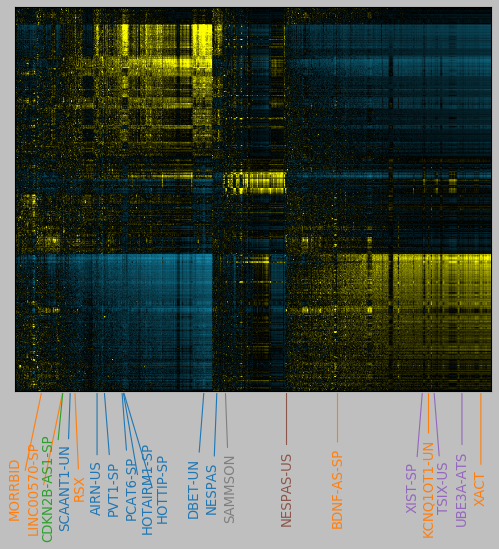

In [20]:
label_dict_log = defaultdict(list)
for name, community in groups2_log.loc[label_dict['black']]['group'].iteritems():
    label_dict_log[pal[community]].append(name)
    
infile = '/home/jessime/Research/mrna_lncrna/cis_45k_list.txt'
image = '/home/jessime/Research/pics/cis_45k.png'
outfile = '/home/jessime/Research/pics/cis_45k_labeled_log.pdf'
label_heatmap.main(label_dict_log, infile, image, outfile, fontsize=12, max_iter=2000)

In [21]:
gml_path_log = '/home/jessime/Research/mrna_lncrna/v26_extend_log.gml'
graph_log = igraph.Graph.Read_GML(gml_path_log)

In [23]:
del graph_log.vs['igraph1476']
del graph_log.vs['igraph2379']
del graph_log.vs['stable']

In [24]:
graph_log.vs['group'] = groups2_log['group'].values

In [25]:
out_path = '/home/jessime/Research/mrna_lncrna/v26_extend_leiden_log.gml'
graph_log.write_gml(out_path)

Now I can plot the network in gephi